In [26]:
import pandas as pd
import os.path
import time
import matplotlib.pyplot as plt
from apyori import apriori
datasetPath = input("Enter Dataset Path:")
while not os.path.isfile(datasetPath):
    print("Please Enter a valid path.")
    time.sleep(3)
    datasetPath = input("Enter Dataset Path:")
else:
    numberOfClusters = int(input("Enter number of clusters (N) :"))
    if numberOfClusters >=4 or numberOfClusters <= 2:
        print("Number of clusters should be between 2 and 4.")
    minSupport = float(input("Enter minimum support :"))
    if minSupport <= 0.001 or minSupport >= 1:
        print("Minimum support should be between 0.001 and 1.")
    minConfidence = float(input("Enter minimum confidence :"))
    if minConfidence <= 0.001 or minSupport >= 1:
        print("Minimum confidence should be between 0.001 and 1")
    dataSet=pd.read_csv(datasetPath)

In [27]:
x = dataSet.iloc[:,[2,5]].values

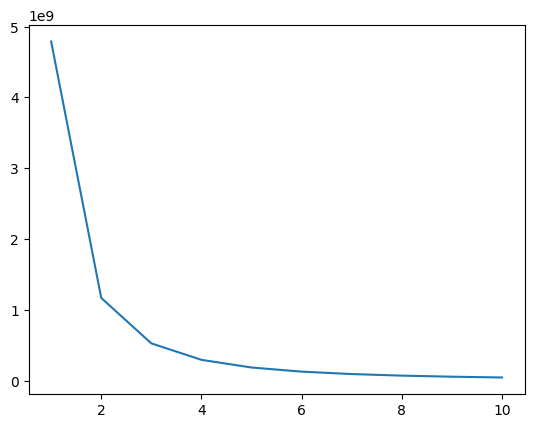

In [28]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init='auto')
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)

Text(0, 0.5, 'Age')

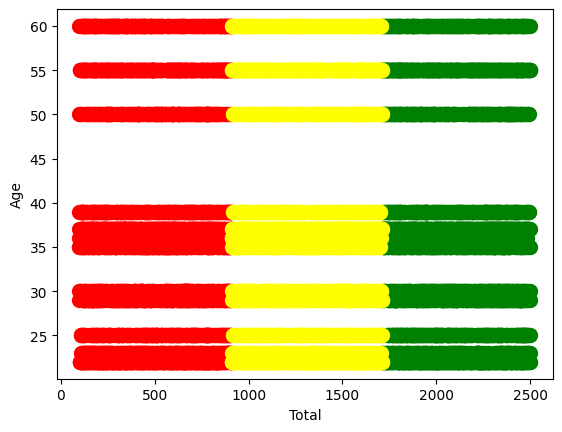

In [29]:
kmeans = KMeans(n_clusters=numberOfClusters,init='k-means++',n_init='auto')
y_kmeans = kmeans.fit_predict(x)
dataSet = pd.concat([dataSet,pd.DataFrame(y_kmeans)],axis=1)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='yellow')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='black')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='blue')
plt.xlabel("Total")
plt.ylabel("Age")

In [30]:
display(dataSet.loc[:,["customer","age","total",0]])

,customer,age,total,0
0,Maged,60,1612,2
1,Eman,23,509,0
2,Rania,37,2084,1
3,Rania,37,788,0
4,Magdy,36,1182,2
...,...,...,...,...
9830,Farida,22,2048,1
9831,Adel,50,1912,1
9832,Farida,22,2482,1
9833,Adel,50,2101,1


In [31]:
records = []
itemDataSet =pd.DataFrame(dataSet['items'])
itemDataSet = pd.concat([itemDataSet['items'], itemDataSet['items'].str.split(',', expand=True)], axis=1)
for i in range(0, 9835):
    records.append([str(itemDataSet.values[i,j]) for j in range(0,33)])
new_records=[]
temp=[]
for i in range(0,9835):
    for j in range(0,len(records[i])):
        if records[i][j]!='None':
         temp.append(records[i][j])
    new_records.append(temp)
    temp=[]
del records
del temp

In [32]:
association_rules = apriori(new_records, min_support=minSupport, min_confidence=minConfidence, min_lift=3, min_length=2)
association_results = list(association_rules)

In [33]:
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))
output_DataFrame = pd.DataFrame(inspect(association_results), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
display(output_DataFrame)

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,baking powder,whipped/sour cream,0.004575,0.258621,3.607850
1,beef,root vegetables,0.017387,0.331395,3.040367
2,berries,whipped/sour cream,0.009049,0.272171,3.796886
3,liquor,bottled beer,0.004677,0.422018,5.240594
4,red/blush wine,bottled beer,0.004881,0.253968,3.153760
...,...,...,...,...,...
59,yogurt,whole milk,0.007829,0.303150,4.050919
60,tropical fruit,yogurt,0.007626,0.212465,3.792358
61,yogurt,whole milk,0.005592,0.269608,3.602708
62,whole milk,yogurt,0.004881,0.444444,3.185941
